# DSCI Group Project Report: Predicting Heart Disease based on Age, Resting Blood Pressure, and Cholesterol Levels #

#### Clare Sheinin, Emese Soti, Saman Atiq, Sarah Teng ####

## Introduction ##

Heart disease is a term that refers to a variety of conditions that affect the heart. Common conditions include coronary artery disease and exercise-induced angina. Several factors are associated with heart disease, including high blood pressure, high levels of sodium, cholesterol, sugar, and fats, and increasing age (Dalen et al., 2014). In the US, heart disease is the greatest cause of death for both men and women, claiming one life every 33 seconds. In 2021, 695,000 people died from heart disease (CDC, 2023). Considering these stats, we decided to base our project on a knn classification algorithm that will help us predict the presence of heart disease. 

**"Can we predict if a patient has heart disease based on their age, resting blood pressure, and cholesterol levels?"** 

We will assess the Cleveland Heart Disease dataset to help us answer this question. The column-names are as follows:
1. **age** - Patient's age
2. **sex** - Patient's sex
3. **cp** - Chest pain type
4. **trestbps** - Resting blood pressure
5. **chol** - Cholesterol level (mg/dl)
6. **fbs**- True if patient's fasting blood sugar > 120 mg/dl
7. **restecg** - Resting electrocardiographic 
8. **thalach** - Maximum heart rate
9. **exang** - Exercise-induced angina (yes or no)
10. **oldpeak** - ST exercise-induced Depression
11. **slope** - Slope of the peak exercise ST segment 
12. **ca** - Number of major vessels (0-3) 
13. **thal** - Presence of thalassemia 
14. **num** - Diagnosis of heart disease (val= 0 indicates absence of heart disease, val= (1, 2, 3, 4) shows presence of heart disease

## Cleaning and wrangling the data set: ##

### Preliminary exploratory data analysis:

In [1]:
# Loading tidyverse libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
# Reading in the Data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cleveland <- read_delim(url, delim = ",", col_names = FALSE)                          
cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [3]:
# assigned NA to "?" values 
cleveland[ cleveland == "?" ] <- NA
# The data had no column names, so here we added them
columns <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
cleveland <- read_csv(url, col_names = columns)
cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [4]:
# Here we changed our variables of interest into factors and integers to make them easier to work with/plot
# The 'num' column becomes 'yes' or 'no' based on whether the number indicates heart disease 
# (val= 0 indicates absence of heart disease, val= (1, 2, 3, 4) shows presence of heart disease
set.seed(1)
cleveland_tidy <- cleveland |>
  mutate(
    num = as.factor(as.integer(num)),
    num = recode(num, "0" = "No", "1" = "Yes", "2" = "Yes", "3" = "Yes", "4" = "Yes"),
    restecg = as.integer(restecg),
    restecg = recode(restecg, "0" = "0", "1" = "1", "2" = "1"),
    exang = as.integer(exang),
    age = as.integer(age),
    restecg = as.integer(restecg),
    trestbps = as.integer(trestbps),
    chol = as.integer(chol)
      ) |>
    filter(ca != "?")
cleveland_tidy

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,1,150,0,2.3,3,0.0,6.0,No
67,1,4,160,286,0,1,108,1,1.5,2,3.0,3.0,Yes
67,1,4,120,229,0,1,129,1,2.6,2,2.0,7.0,Yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,Yes
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,Yes
57,0,2,130,236,0,1,174,0,0.0,2,1.0,3.0,Yes


In [5]:
# Splitting the data into training and testing sets
cleveland_split <- initial_split(cleveland_tidy, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

In [6]:
# Summarizing the data
cleveland_table <- cleveland_train |>
    group_by(num) |>
    summarize(n_obs = n(), age_avg = mean(age), restecg_avg = mean(restecg), 
              exang_avg = mean(exang), trestbps_avg = mean(trestbps), chol_avg = mean(chol))
cleveland_table

num,n_obs,age_avg,restecg_avg,exang_avg,trestbps_avg,chol_avg
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
No,120,52.64167,0.4250000,0.1333333,129.9583,244.1333
Yes,103,56.35922,0.5825243,0.5145631,134.6893,247.7282


- We can see from this table that the average age is higher for those with heart disease
- On average more patients with heart disease had abnormal ECG and angina values (1 = abnormal)
- On average heart disease patients had higher resting blood pressure and higher cholesterol

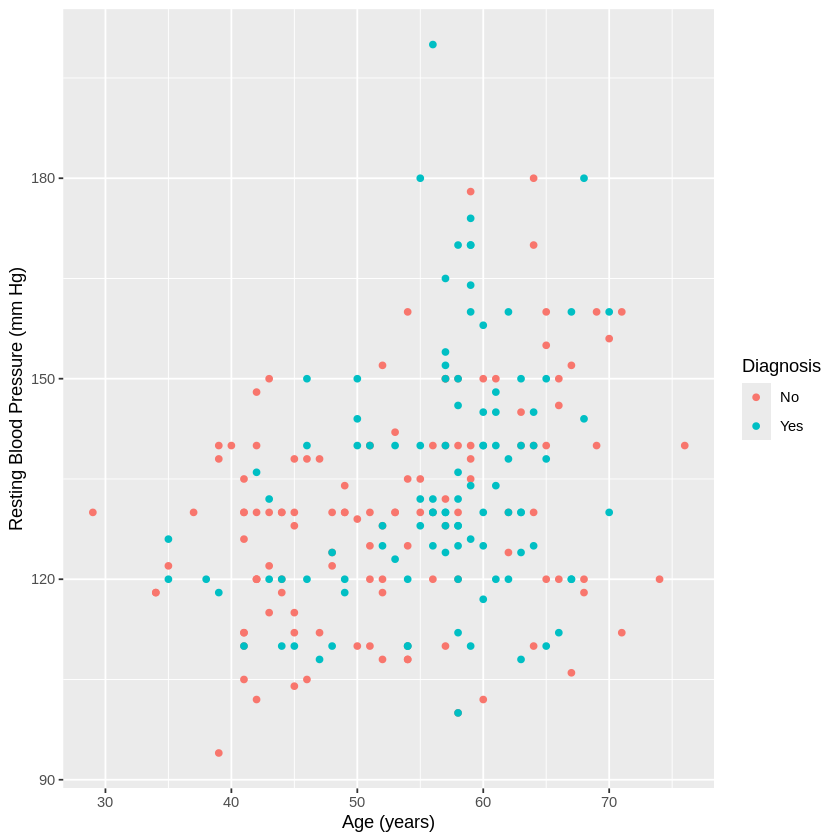

In [7]:
set.seed(1)
plot_1 <- ggplot(cleveland_train, aes(x = age, y = trestbps, color = num)) +
          geom_point() +
          labs (x = "Age (years)", y = "Resting Blood Pressure (mm Hg)", color = "Diagnosis")       
plot_1
# There's a slight positive trend in the data, with a higher concentration of "Yes" diagnoses farther from the origin

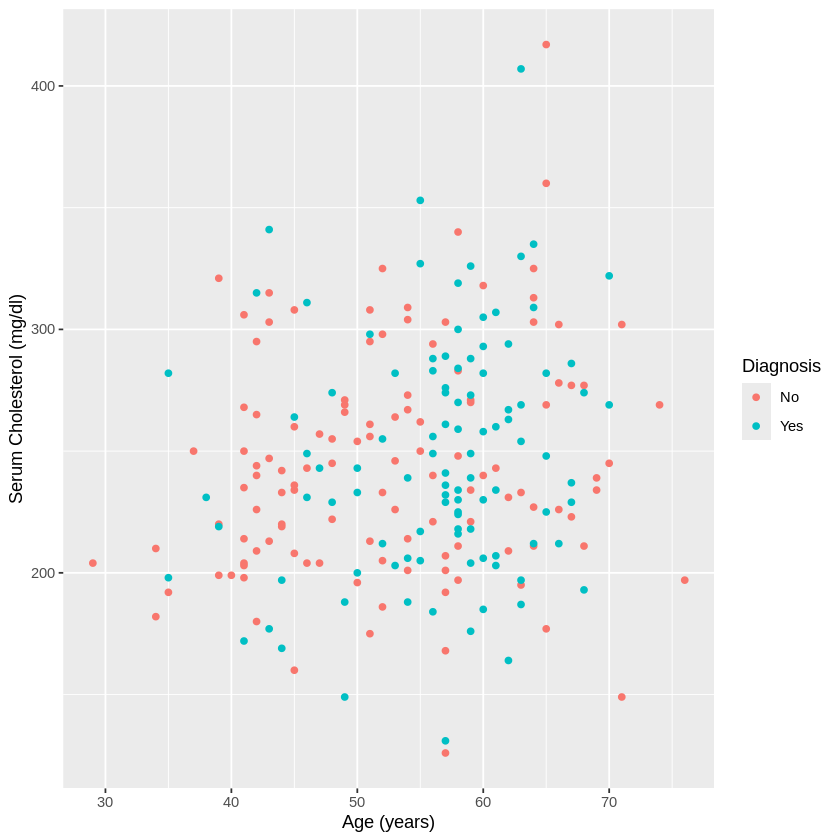

In [8]:
set.seed(1)
plot_2 <- ggplot(cleveland_train, aes(x = age, y = chol, color = num)) +
          geom_point() +
          labs (x = "Age (years)", y = "Serum Cholesterol (mg/dl)", color = "Diagnosis")       
plot_2
# Again, there's a slight positive trend in the data, with a higher concentration of "Yes" diagnoses farther from the origin

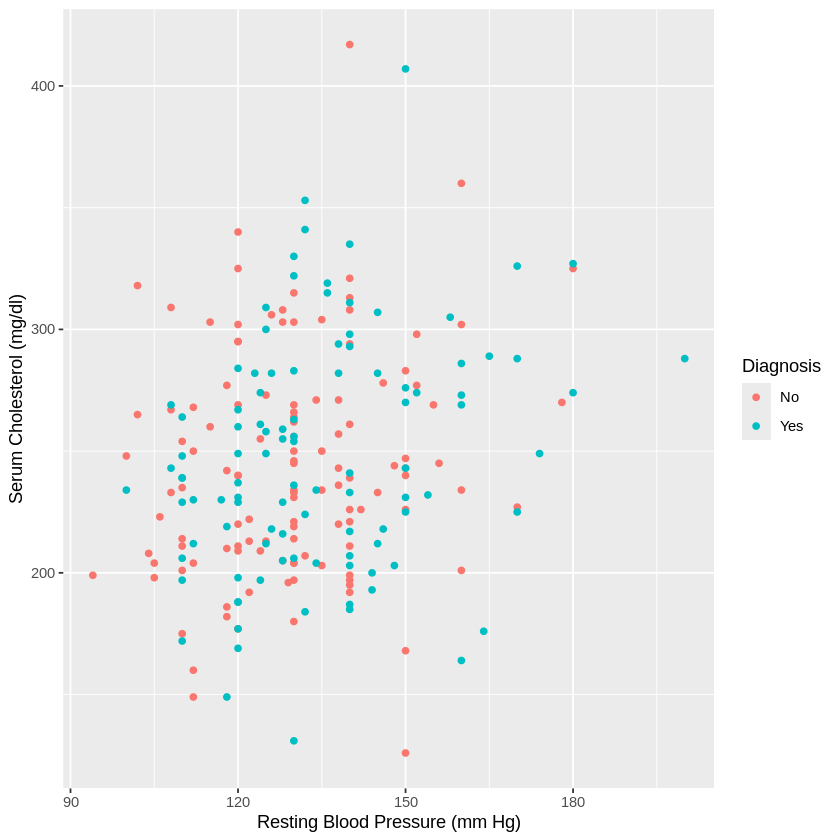

In [9]:
set.seed(1)
plot_3 <- ggplot(cleveland_train, aes(x = trestbps, y = chol, color = num)) +
          geom_point() +
          labs (x = "Resting Blood Pressure (mm Hg)", y = "Serum Cholesterol (mg/dl)", color = "Diagnosis")       
plot_3
# Again, there's a slight positive trend in the data, but no clear higher concentration of diagnoses

In [18]:
set.seed(1)
cleveland_recipe <- recipe(num ~ age + chol, data = cleveland_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

cleveland_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

cleveland_vfold <- vfold_cv(cleveland_train, v = 10, strata = num)

cleveland_wkflw <- workflow() |>
    add_recipe(cleveland_recipe) |>
    add_model(cleveland_spec)

gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 1))


cleveland_results <- cleveland_wkflw |>
    tune_grid(resamples = cleveland_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy") |>
    select(neighbors, mean) |>
    arrange(desc(mean))

In [24]:
head(cleveland_results)

neighbors,mean
<dbl>,<dbl>
81,0.6326087
82,0.6326087
87,0.6280632
88,0.6280632
97,0.6278656
98,0.6278656


## Comparing Model to a Major Classifier ##

Next, we need to compare the accuracy of our model to a major classifier. This can be done with the `cleveland_train` data by grouping the data based on the diagnosis with the `group_by` function and summarizing it to determine the percentage of the class with the most points. 

In [20]:
cleveland_accuracy <- cleveland_train |>
    group_by(num) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(cleveland_train))
cleveland_accuracy

num,n,percent
<fct>,<int>,<dbl>
No,120,53.81166
Yes,103,46.18834


## Building a Final Model ##
Now that we have determined the value of k, we can build our final model using `neighbors = 81`.

In [ ]:
set.seed(1)

final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 81) |>
    set_engine("kknn") |>
    set_mode("classification")

final_fit <- workflow() |>
    add_recipe(cleveland_recipe) |>
    add_model(final_spec) |>
    

## Method:
### Data analysis:
We first loaded the data set into our proposal and added column headings to the dataset since they were missing in the original file. Then we split the data set(using inital_split) into the training and testing data set using the optimal 75:25 ratio and renamed "?" values to NA. After analysing the values of resting ecg, exercise-induced angina, resting blood pressure and cholesterol levels, we saw that the average age is higher for those with heart disease, and ​​on average heart disease patients had higher resting blood pressure and higher cholesterol. 
Therefore we decided to use age, trestbps, and chol columns as predictors for our data analyses to predict the "num" column (diagnosis).



### Visualizing the results:
We used scatter plots to plot resting blood pressure, age and cholesterol levels to show the correlation and predict the diagnosis of the patient. 
The points were colored and shaped based on diagnosis, with no representing absence, and yes representing the presence of heart disease.


## Expected Outcomes and Significance ##

We expect the risk of heart disease is influenced by blood pressure, cholesterol levels, presence of angina, resting ECG, and age. Patients with heart disease are more likely to have high blood pressure, high cholesterol levels, and be older in age. 

These findings could be used to develop programs that help doctors diagnose potential heart conditions. Additionally, this data can help patients visualize how these factors influence the presence of heart disease to discuss with doctors about what they may do to reduce their risk. 

This analysis could lead to more investigations into how significant each factor is to the risk of heart disease and possibly can be used to answer future questions like:

1. Which predictor has the most influence in correctly predicting the existence of a heart disease?
2. How do these predictors influence the recovery outcomes of patients after heart disease diagnosis or treatment?


## References: ##

- CDC. (2023, May 15). Heart disease facts. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/facts.htm
- Dalen, J. E. et al. (2014, September). The Epidemic of the 20th Century: Coronary Heart Disease. ScienceDirect. https://www.sciencedirect.com/science/article/pii/S0002934314003544?casa_token=_36v0JdxfakAAAAA:BnwjoW6neks6CjsRkrlIL6q9CeQJS_xmTMvD1s41q6E1pQPv-9vFccwtaHn_lp4t6MomcHFFVQ

- The creators of the Heart Disease Database are:
  
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.

2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.

3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.

4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.